# Fitting neutrino oscillations parameters using T2K SuperKamiokande data

The T2K (Tokai to Kamioka) experiment is in Japan, aiming to measure neutrino oscillation parameters by fitting an oscillation model to the observed data. The three-flavour neutrino oscillation model gives a probability of oscillation of a neutrino, with a given energy and flavour, to being observed as another flavour of neutrino after some distance of travel. In order to measure this a dominantly muon-neutrino beam is sent from the J-Parc accelerator complex to 295 km away to Kamioka. The beam is measured by a Near Detector (in Tokai) and a Far Detector (in Kamioka).

Neutrinos oscillate from one flavour to the other according to the $3x3$ PMNS (Pontecorvo-Maki-Nakagawa-Sakata) matrix, $U$, which can be complex. One way to write the full 3-flavour oscillation probability is this:

\begin{equation}
P_{\alpha\rightarrow\beta} = \delta_{\alpha\beta} - 4\sum_{i > j}Re(U^{*}_{\alpha i}U_{\beta i}U_{\alpha j}U_{\beta j}^{*})sin^{2}\left(\frac{\Delta m_{ij}^{2} L}{4E}\right) + 2\sum_{i > j}Im(U^{*}_{\alpha i}U_{\beta i}U_{\alpha j}U_{\beta j}^{*})sin\left(\frac{\Delta m_{ij}^{2} L}{2E}\right)
\end{equation}

where $L$ is the distance of the travel, $E$ is the neutrino energy and $\Delta m_{ij}^{2} = m_{i}^{2} - m_{j}^{2}$ is the squared mass differences between the mass eigenstates. With the help of python we can visualize the oscillations. I have written a class, called PMNS, calculating the 3-flavour neutrino oscillation probabilities as a function of neutrino energy and distance. It assumes the Particle Data Group best values for the oscillation parameters. We plot the probability of electron neutrino appreance as a function of the neutrino energy. We plot it for two different oscillation parameter values for $\Theta_{23}$: the standard value from PDG, and a bit larger one and see how it affects the energy spectrum.


PDG Theta_23:  0.6724753607934152
Alternative Theta_23:  0.9


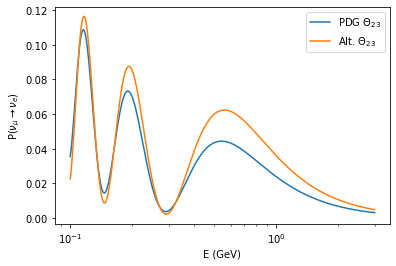

In [93]:
from PMNS2 import PMNS
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# instantiate the class of neutrinos
x = PMNS()
x.setDeltaCP(-90)
x.setMassOrderModel(1, False)
x.calcPMNS()

print("PDG Theta_23: ", x.theta_23)

Prob = [] # Probability
Enu = [] # Neutrino energy
E = 0.6 # GeV
L = 295 # km, Near Detector to Far Detector distance (T2K)
# Oscillating flavours: nu_e: 0, nu_mu: 1, nu_tau: 2
# E.g. oscillating from nu_mu to nu_e: 1 -> 0

# Array of energies
for v in np.array(np.arange(0.1,3,0.001)):
    value = x.calcOsc_E(1, 0, L, v)
    Prob.append(value)
    Enu.append(v)
    

#plt.plot(Enu,Prob)
plt.semilogx(Enu,Prob, label=r'PDG $\Theta_{23}$')
plt.ylabel(r'P($\nu_{\mu} \rightarrow \nu_{e}$)')
plt.xlabel('E (GeV)')
#plt.axis([0.1, 3, 0., 0.1])

# Now take another parameter for Theta_23
x2 = PMNS()
x2.setDeltaCP(-90)
x2.setMassOrderModel(1, False)
x2.theta_23 = 0.9
x2.calcPMNS()
print("Alternative Theta_23: ", x2.theta_23)

Prob2 = []
for v in np.array(np.arange(0.1,3,0.001)):
    value = x2.calcOsc_E(1, 0, L, v)
    Prob2.append(value)
plt.semilogx(Enu,Prob2, label=r'Alt. $\Theta_{23}$')
plt.legend()
plt.show()


In the figure above one can see that the oscillation results in an oscillating energy spectrum. Therefore, for a given flux of neutrinos and a fixed detector, one can calculate for a variety of oscillation parameter values what the model predicted energy spectrum would look like and can compare with data to get the best one in agreement.

In order to measure the neutrino oscillation probabilities from counting events at the Far Detector (FD), one needs an unoscillated flux model, a target volume mass and size, and a cross section model. With such a model one can generate various predictions for the FD event spectrum as a function of the various neutrino oscillation parameters, and compare with the data. 

We use a fixed neutrino flux model given from T2K. It is given for a nominal integrated flux per $10^{21}$ POT (Protons on Target). We scale all the results to a target integrated flux of $5x10^{21}$ POT in the following demo example. This is an arbitrary choice, one can change. Lowering it will increase the size of the confidence obtained for the parameters of interest.

The target at the FD is a large water Cherenkov detector. Therefore one needs the total neutrino scattering cross section on water. In addition, we are going to use a tuned, unoscillated neutrino flux prediction. These can be seen below.

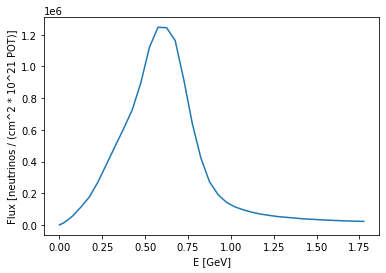

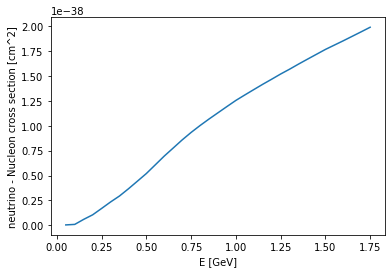

In [94]:
from Flux_CrossSection_model import Flux, E, e, xsec, npoints, flux_norm

plt.plot(E,Flux)
plt.xlabel("E [GeV]")
plt.ylabel("Flux [neutrinos / (cm^2 * 10^21 POT)]")
plt.show()

plt.plot(e,xsec)
plt.xlabel("E [GeV]")
plt.ylabel("neutrino - Nucleon cross section [cm^2]")
plt.show()

The units are important. Above we have the Flux in unit of $[neutrinos/cm^2]$ per $10^{21}$ POT (Proton on Target). While the cross section unit is $[10^{-38}cm^{2}]$. Then we need the distance, target mass, volume and the oscillation model to make a prediction for the amount of detected events at the FD. Also, we are going to use the $\nu_{e}$ electron neutrino appereance mode, that is oscillation probabilities using $P(\nu_{\mu} \rightarrow \nu_{e}$). Let's do it in a code:

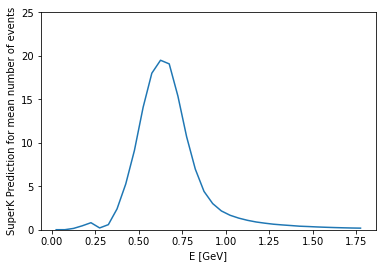

In [95]:
# FD Distance
L = 295 # kilometers
# FD height
H = 42 # meters
Hcm = H*100 # cm
# FD width
D = 20 # meters
Dcm = D*100 # cm

# SK fiducial mass 22.5 kton water
Density = 1000 # kg/m3
Density_gcm3 = 1 # g/cm3
Mol = 6e+23 # Avogadro n of particles

# This is the neutrino oscillation model
x = PMNS()
x.setDeltaCP(-90)
x.setMassOrderModel(1, False)
# true value, give ~ 5 true values
x.delta_m32 = 0.0035
x.calcPMNS()

# Let's calculate the mean prediction for the FD
Nev = []
Ev = []
for i in np.array(np.arange(0,npoints)):
    if E[i] > 0:
        prob = x.calcOsc_E(1, 0, L, E[i])
        Ev.append(E[i])
        #prob = 1
        Nev.append( prob*flux_norm*Flux[i] * np.interp(E[i], e,xsec) * Density_gcm3 * Hcm*(Dcm*Dcm)*Mol)
        # [n_particles/(cm2*10^21 POT)]*[cm2]*[g/cm3] * [cm3] * [Mol] / [g/Mol]
        # Note: cross section is already given per Water molecule, therefore molar mass not needed

# this is the mean prediction
plt.plot(Ev,Nev)
plt.ylim(0.0, 25.0)
plt.xlabel("E [GeV]")
plt.ylabel("SuperK Prediction for mean number of events")
plt.show()

The above is only the prediction of the "mean" number of electron neutrino events detected at the FD. In reality the measurement fluctuates following the Poisson distribution around the mean. Therefore, the observation is a random sampling from this mean, and we need to randomly sample for each energy bin from a Poisson with the mean given by the curve above. Note that we need to interpolate the cross section and flux model to evaluate it at the energy values of interest:

C:\Users\Ohh no need to thank\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\Ohh no need to thank\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


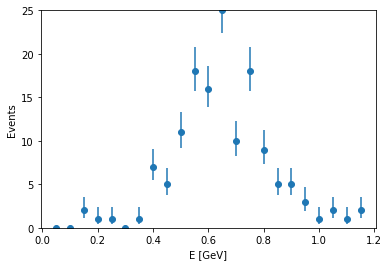

In [96]:
from scipy.stats import chi2
Data = []
DataerrLow= []
DataerrUp = []
EData = []
for ei in np.array(np.arange(0, 1.2, 0.05)):
    if ei > 0:
        Nobs = np.random.poisson(np.interp(ei, np.asarray(Ev,dtype=np.float32),
                                                np.asarray(Nev,dtype=np.float32)))
        Data.append(Nobs)
        # 68% asymmetric error on Poisson from chi2 quantiles
        DataerrLow.append(Nobs - 0.5*chi2.ppf(1-0.68, 2*Nobs))
        DataerrUp.append(0.5*chi2.ppf(0.68, 2*(Nobs+1))-Nobs)      
        EData.append(ei)

plt.errorbar(EData, Data, yerr=[DataerrLow,DataerrUp], fmt='o')
plt.ylim(0.0, 25.0)
plt.xlabel("E [GeV]")
plt.ylabel("Events")
plt.show()

# Using Bayes theorem and PyMC3 to fit the data with the PMNS model

We aim to try to measure the compatibility with the data. First we create a mean prediction as a function of the parameters of interest (theta23 and deltaM32). 

In [97]:
import scipy.stats as stats
import pymc3 as pm
import mpmath as mp
import theano
import theano.tensor as t
from theano.compile.ops import as_op

# Create another instance of PMNS class
xnew = PMNS()
xnew.setDeltaCP(-90)
xnew.setMassOrderModel(1, False)
m32nominal_norm = xnew.delta_m32

# My Model
# Some utility functions:
# Predicted mean energy spectrum
@as_op(itypes=[t.dscalar, t.dscalar],otypes=[t.dvector])
def GetVectorMeans(theta23, dm32):
    xnew.theta_23 = theta23
    xnew.delta_m32 = dm32
    xnew.setMassOrderModel(1, False, scale_=dm32/m32nominal_norm)
    xnew.calcMassMatrix()
    xnew.calcPMNS()
    myNev = []
    for i in np.array(np.arange(0,len(EData))):
        if EData[i] > 0:
            prob = xnew.calcOsc_E(1, 0, L, EData[i])
            myNev.append( prob*flux_norm*Flux[i] * np.interp(EData[i], e,xsec) * Density_gcm3 * Hcm*(Dcm*Dcm)*Mol)

    return np.array(myNev)

#GetVectorMeans(0.68,0.002)
#p1 = t.dscalar('0.68')
#p2 = t.dscalar('0.002')
#GetVectorMeans(p1, p2)
Data = np.array(Data)
#print(Data)

Calculate the posterior probability using Bayes-theorem. Our Likelihood is the joint probability of the data given some values for the two neutrino oscillation parameters. The prior probabilites for the parameters are just simple uniform pdfs.

In [98]:
# Assume Poisson Likelihood and Uniform/Normal priors
with pm.Model() as model:
    # Prior on theta
    theta_p = pm.Uniform("theta", lower=0.01, upper = 0.99)
    # Prior on deltam_32
    dm32_p = pm.Uniform("dm32", lower = 0.001, upper = 0.004)# limit taken here
    # Likelihood Poisson
    #GetVectorMeans = pm.Deterministic("mean_expectation", GetVectorMeans(theta_p, dm32_p))
    y = pm.Poisson("y", GetVectorMeans(theta_p, dm32_p), observed = Data)
    # Instantiate sampler
    step = pm.Metropolis()
    # Draw posterior samples
    trace = pm.sample(10000, step = step, tune = 2000, cores = 1, return_inferencedata=True)
    

C:\Users\Ohh no need to thank\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Ohh no need to thank\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Ohh no need to thank\anaconda3\lib\site-packages\theano\scalar\basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
C:\Users\Ohh no need to thank\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [dm32]
>Metropolis: [theta]


C:\Users\Ohh no need to thank\anaconda3\lib\site-packages\theano\scalar\basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
C:\Users\Ohh no need to thank\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Sampling 2 chains for 2_000 tune and 10_000 draw iterations (4_000 + 20_000 draws total) took 473 seconds.
The number of effective samples is smaller than 10% for some parameters.


Visualize the Markov Chain Monte Carlo steps in the parameters space, and the marginalized posteriors.

array([[<AxesSubplot:title={'center':'theta'}>,
        <AxesSubplot:title={'center':'theta'}>],
       [<AxesSubplot:title={'center':'dm32'}>,
        <AxesSubplot:title={'center':'dm32'}>]], dtype=object)

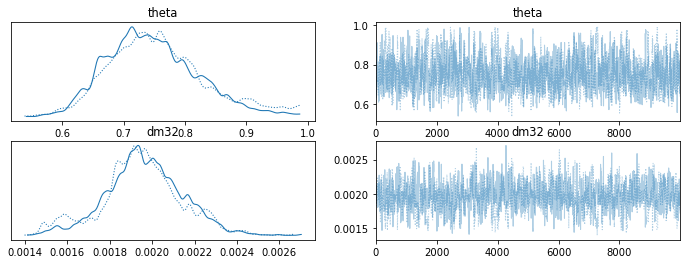

In [99]:
import arviz as az
az.plot_trace(trace)

Look at the correlation between the parameters in the posterior.

C:\Users\Ohh no need to thank\AppData\Local\Temp\ipykernel_3676\733293335.py:1: DeprecationWarning: The function `pairplot` from PyMC3 is just an alias for `plot_pair` from ArviZ. Please switch to `pymc3.plot_pair` or `arviz.plot_pair`.
  pm.pairplot(trace, kind='kde')


<AxesSubplot:xlabel='theta', ylabel='dm32'>

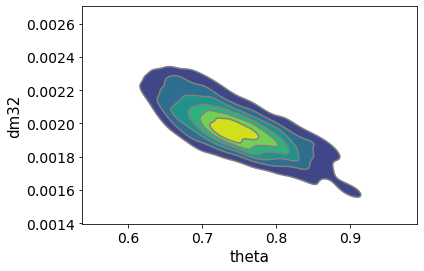

In [100]:
pm.pairplot(trace, kind='kde')

Calculate the Mean and the 95% central credibility interval upper and lower limits for one of the parameters, using the numpy percentile function.

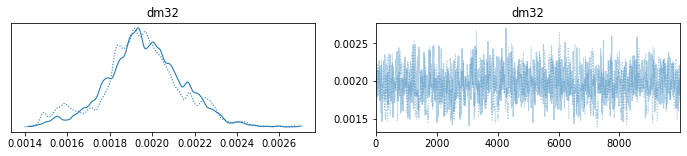

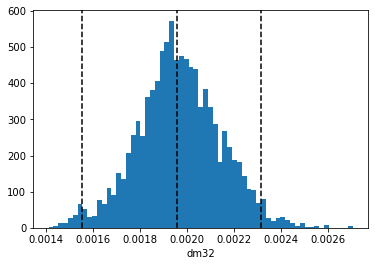

Mean, 2.5 and 97.5 percentiles, p = 0.00196 - 0.00155 + 0.00231 


In [101]:
az.plot_trace(trace, var_names=["dm32"])

# Plot the distribution of the sample means as a histogram
fig, ax = plt.subplots(1, 1)
plt.hist(trace["posterior"]["dm32"][0], bins='auto')


p_mean=np.mean(trace["posterior"]["dm32"][:])
p_low = np.percentile(trace["posterior"]["dm32"][:], [2.5,97.5])[0]
p_high = np.percentile(trace["posterior"]["dm32"][:], [2.5,97.5])[1]

plt.axvline(p_low, c='k', ls='--')
plt.axvline(p_high, c='k', ls='--');
plt.axvline(p_mean, c='k', ls='--');
ax.set_xlabel("dm32")
#ax.set_xlim(0, 1)
plt.show()



print("Mean, 2.5 and 97.5 percentiles, p = %.5f - %.5f + %.5f " % (p_mean, p_low, p_high))

**References**:

T2K oscillation parameter fit result at $2.2x10^{21}$ POT: https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.121.171802

T2K flux prediction: arxiv: 1211.0469v3

Cross sections: NEUT event generator http://inspirehep.net/record/844435/